In [1]:
import numpy as np
from Trefft_tools import Assemble_blockMatrix, AssembleMatrix, TrefftzSpace
from domains import Waveguide, ScattererShape, ScattererType
import matplotlib.pyplot as plt

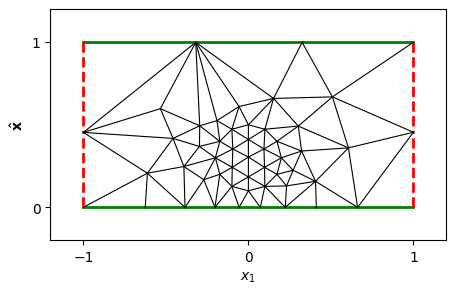

In [21]:
kappa = 8.
R = 1
H = 1.
n_e = 1
n_i = 4 + 2*1j

Domain = Waveguide(R=R,H=H)

Domain.add_scatterer(scatterer_shape=ScattererShape.CIRCLE, scatterer_type= ScattererType.PENETRABLE, params=[(0,0.3*H), 0.2*H])

Domain.generate_mesh(h_max=H/1)
Domain.plot_mesh()

In [22]:
Nth = 15
V = TrefftzSpace(Domain=Domain, DOF_per_element=Nth, n= {"Omega_i" : n_i, "Omega_e" : n_e}, kappa=kappa, th0=0.)


In [28]:
N_DtN = 60
G = Assemble_blockMatrix(V, Edges=Domain.Edges, H=H, k=kappa, N_p=Nth, a = 1/2, b = 1/2, d_1=1/2, d_2=1/2, N_DtN=N_DtN, th_0=0)

In [29]:
A = AssembleMatrix( V, Edges=Domain.Edges, H=H, a = 1/2, b = 1/2, d_1 = 1/2, d_2 = 1/2, Np = N_DtN)

In [30]:
A_full = A.toarray()
G_full = G.toarray()
np.max(np.abs(A_full - G_full))

np.float64(2.2881241346943593e-13)

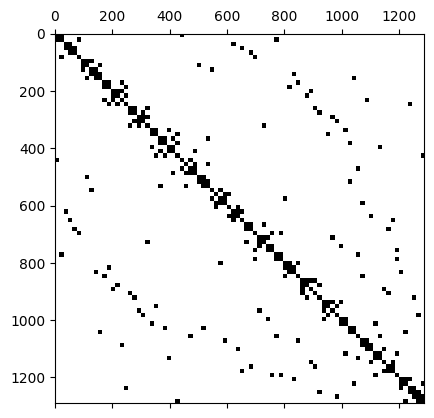

In [31]:
plt.spy(A_full)

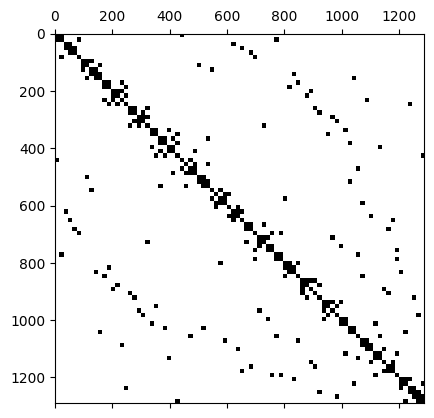

In [32]:
plt.spy(G_full)

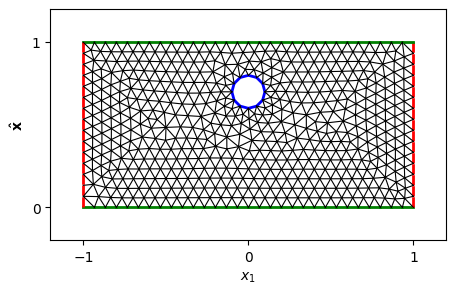

In [48]:
from domains import ScattererShape, ScattererType
kappa = 32.
R = 1
H = 1.

Domain = Waveguide(R=R,H=H)
Domain.add_scatterer(scatterer_shape=ScattererShape.CIRCLE, scatterer_type=ScattererType.SOUND_SOFT, params=[np.array([0,0.7*H]), 0.1*H])
Domain.generate_mesh(h_max=H/15)
Domain.plot_mesh()

In [49]:
Nth = 15

n_e = 1
n_i = 4 + 2*1j

th_0 = 0.

V = TrefftzSpace(Domain=Domain, DOF_per_element=Nth, n= {"Omega_i" : n_i, "Omega_e" : n_e}, kappa=kappa, th0=th_0)
N_DtN = 15
A = Assemble_blockMatrix(V, Edges=Domain.Edges, H=H, k=kappa, N_p=Nth, a = 1/2, b = 1/2, d_1=1/2, d_2=1/2, N_DtN=N_DtN, th_0=th_0 )

In [50]:
A = A.tocsr()

In [51]:
from Trefft_tools import AssembleGreenRHS_left, AssembleRHS

# b = AssembleGreenRHS_left(V, Edges=Domain.Edges, k=kappa, H=H,d_2=1/2, x_0=-1.5*R, y_0=0.3*H, M=N_DtN)
b = AssembleRHS(V=V, Edges=Domain.Edges, k=kappa, H=H, d_2=1/2, t=1)

In [52]:
from scipy.sparse.linalg import spsolve as solve 
p = solve(A, b, use_umfpack=True)

In [53]:
Ny = 300
Nx = int(R/H)*Ny
x = np.linspace(-R,R,Nx)
y = np.linspace(0,H, Ny)
X, Y = np.meshgrid(x,y)


from Trefft_tools import TrefftzFunction

f = TrefftzFunction(V, p)

U_tot = np.array([f(x,y) for (x,y) in zip(X.flatten(), Y.flatten())]).reshape(X.shape)

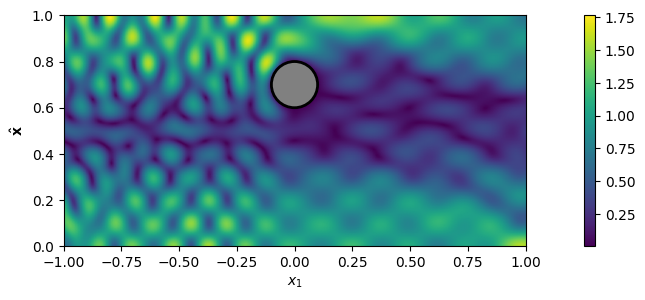

In [54]:
Domain.plot_field(X,Y,np.abs(U_tot))